In [1]:
import os
import sys
import skimage.io
from mrcnn import model as modellib
from mrcnn.visualize import display_instances
import matplotlib.pyplot as plt
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mrcnn import visualize
from mrcnn.model import log
from mrcnn.config import Config
from mrcnn import model as modellib, utils

In [2]:
ROOT_DIR = "/Users/fatimanevrekar/Desktop/Plant_Health_Detection/Plant_Health_MaskRCNN"
print("ROOT_DIR:",ROOT_DIR)

ROOT_DIR: /Users/fatimanevrekar/Desktop/Plant_Health_Detection/Plant_Health_MaskRCNN


In [3]:
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from custom import CustomConfig, CustomDataset  # Import your CustomConfig and CustomDataset

In [4]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
print("MODEL_DIR:",MODEL_DIR)

MODEL_DIR: /Users/fatimanevrekar/Desktop/Plant_Health_Detection/Plant_Health_MaskRCNN/logs


In [5]:
# Path to the trained weights file
TRAINED_MODEL_PATH = os.path.join(MODEL_DIR, "object20231118T2114/mask_rcnn_object_0038.h5")  # Update with your model file name
print("TRAINED_MODEL_PATH:",TRAINED_MODEL_PATH)

TRAINED_MODEL_PATH: /Users/fatimanevrekar/Desktop/Plant_Health_Detection/Plant_Health_MaskRCNN/logs/object20231118T2114/mask_rcnn_object_0038.h5


In [11]:
# Define the configuration for inference
class InferenceConfig(CustomConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 6
        
    MASK_SHAPE = [56, 56]

config = InferenceConfig()

In [12]:
model_ = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

weights_path = os.path.join(MODEL_DIR, "object20231118T2114/mask_rcnn_object_0038.h5")
model_.load_weights(weights_path, by_name=True)
clear_output()

In [13]:
def get_ax(rows=1, cols=1, size=5):
  _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
  return ax

In [ ]:
# Display results
def detect_hlth(pth):
    image1 = mpimg.imread(pth)
    results1 = model_.detect([image1], verbose=1)
    ax = get_ax(1)
    r1 = results1[0]
    lbl_list=["Potato_Early_Blight","Potato_Healthy","Potato_Late_Blight","Tomato_Healthy","Tomato_Leaf_Mold",
              "Tomato_Leaf_Spot","Detection Error: Unable to detect, Try again with valid image",""]
    
    empty_list=["","","","","","",""]
    try:
        cls_value=r1['class_ids'][0]
    except IndexError:
        cls_value=7

    if cls_value==1:
        c1=lbl_list[0]
        c2,c3,c4,c5,c6,err=lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7]
    elif cls_value==2:
        c2=lbl_list[1]
        c1,c3,c4,c5,c6,err=lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7]
    elif cls_value==3:
        c3=lbl_list[2]
        c1,c2,c4,c5,c6,err=lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7]
    elif cls_value==4:
        c4=lbl_list[3]
        c1,c2,c3,c5,c6,err=lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7]
    elif cls_value==5:
        c5=lbl_list[4]
        c1,c2,c3,c4,c6,err=lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7]
    elif cls_value==6:
        c6=lbl_list[5]
        c1,c2,c3,c4,c5,err=lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7]
    else:
        err=lbl_list[6]
        c1,c2,c3,c4,c5,c6=lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7],lbl_list[7]
    
    visualize.display_instances(image1, r1['rois'], r1['masks'], r1['class_ids'],empty_list,r1['scores'], 
                                ax=ax,title=c1 or c2 or c3 or c4 or c5 or c6  or err)

In [14]:
# Define the known class names in the order that your model was trained with
class_names = ['BG', 'Potato_Early_Blight', 'Potato_Healthy', 'Potato_Late_Blight',
               'Tomato_Healthy', 'Tomato_Leaf_Mold', 'Tomato_Leaf_Spot']


Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 19)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


2023-11-19 22:38:29.861325: W tensorflow/c/c_api.cc:304] Operation '{name:'res4g_branch2c_1/kernel/Assign' id:12389 op device:{requested: '', assigned: ''} def:{{{node res4g_branch2c_1/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](res4g_branch2c_1/kernel, res4g_branch2c_1/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-11-19 22:38:31.173947: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:693] Error in PredictCost() for the op: op: "CropAndResize" attr { key: "T" value { type: DT_FLOAT } } attr { key: "extrapolation_value" value { f: 0 } } attr { key: "method" value { s: "bilinear" } } inputs { dtype: DT_FLOAT shape { dim { size: -48 } dim { size: -308 } dim { size: -309 } dim { size: 256 } } } inp

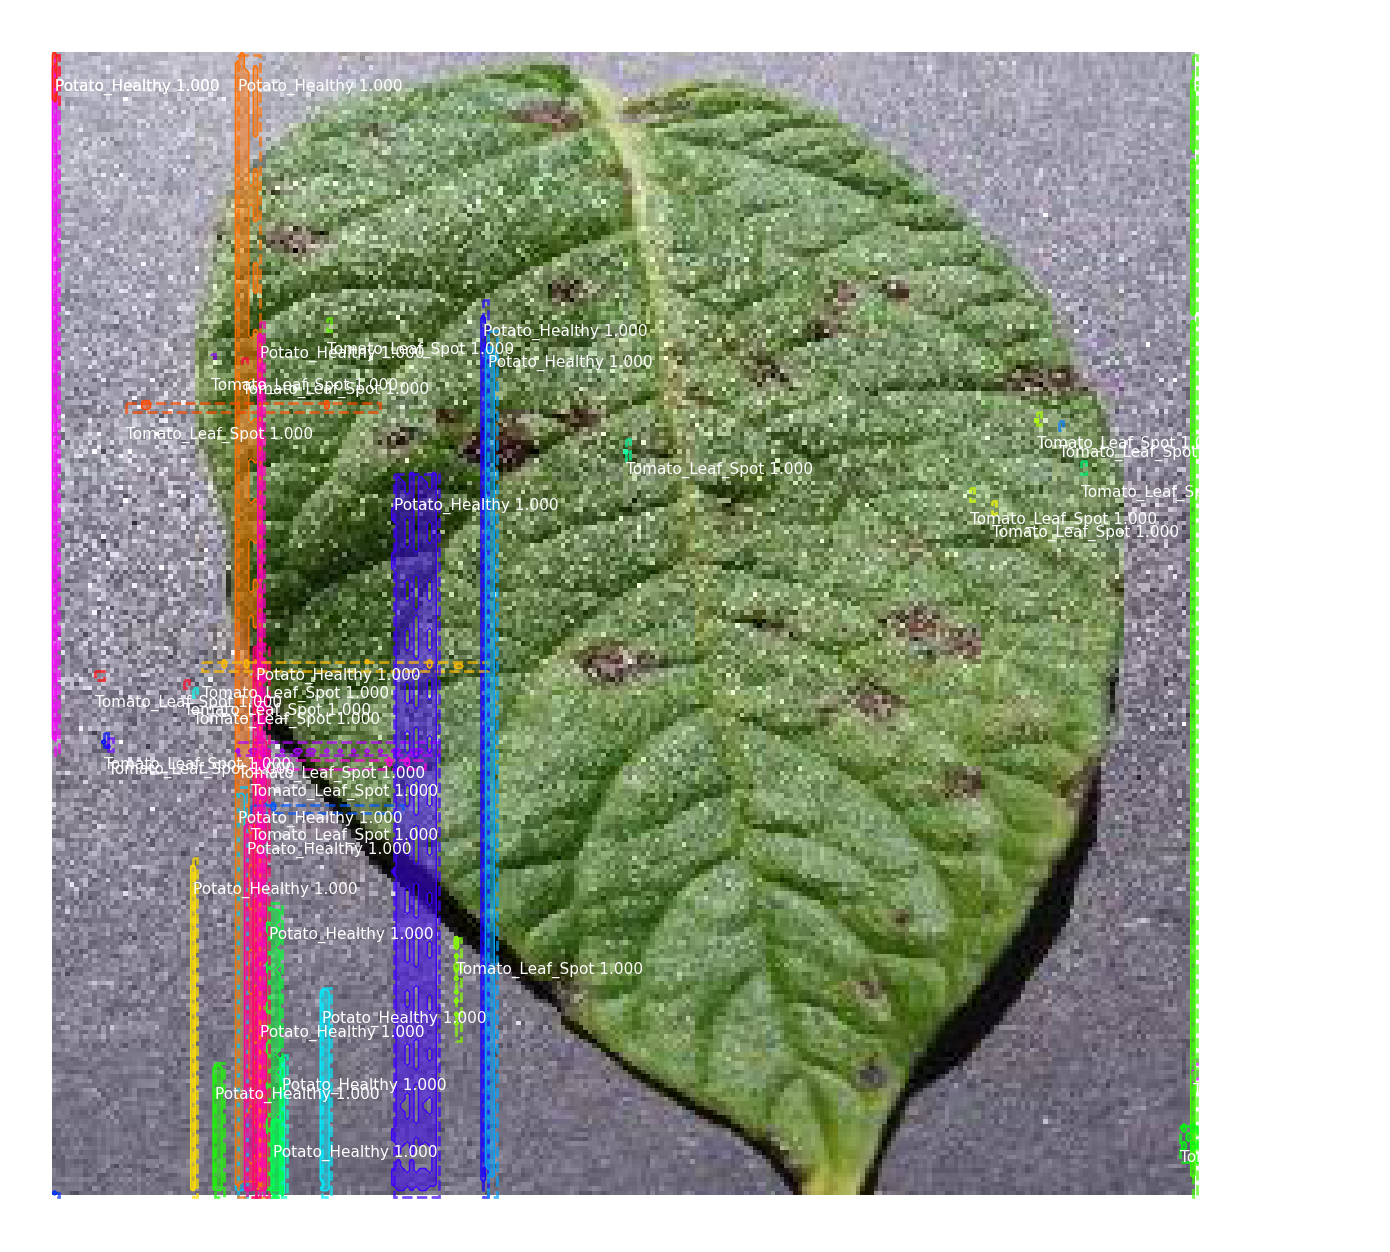

In [15]:
def apply_nms(objects, scores, nms_threshold=0.3):
    # Apply non-maximum suppression to avoid multiple detections of the same object
    keep_indices = utils.non_max_suppression(objects, scores, nms_threshold)
    return keep_indices

def detect_and_visualize(model, image_path, nms_threshold=0.3):
    # Define your class names here
    class_names = ['BG', 'Potato_Early_Blight', 'Potato_Healthy', 'Potato_Late_Blight',
                   'Tomato_Healthy', 'Tomato_Leaf_Mold', 'Tomato_Leaf_Spot']

    # Load the image
    image = skimage.io.imread(image_path)

    # Detect objects in the image
    results = model.detect([image], verbose=1)
    r = results[0]

    # Apply NMS
    keep_indices = apply_nms(r['rois'], r['scores'], nms_threshold=nms_threshold)
    
    # Filter results after NMS
    filtered_rois = r['rois'][keep_indices]
    filtered_class_ids = r['class_ids'][keep_indices]
    filtered_scores = r['scores'][keep_indices]
    filtered_masks = r['masks'][:, :, keep_indices]

    # Visualize the results
    display_instances(image, filtered_rois, filtered_masks, filtered_class_ids, 
                      class_names, filtered_scores)

image_path = '/Users/fatimanevrekar/Desktop/Plant_Health_Detection/Plant_Health_MaskRCNN/example.JPG'
detect_and_visualize(model_, image_path, nms_threshold=0.3)

Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 19)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


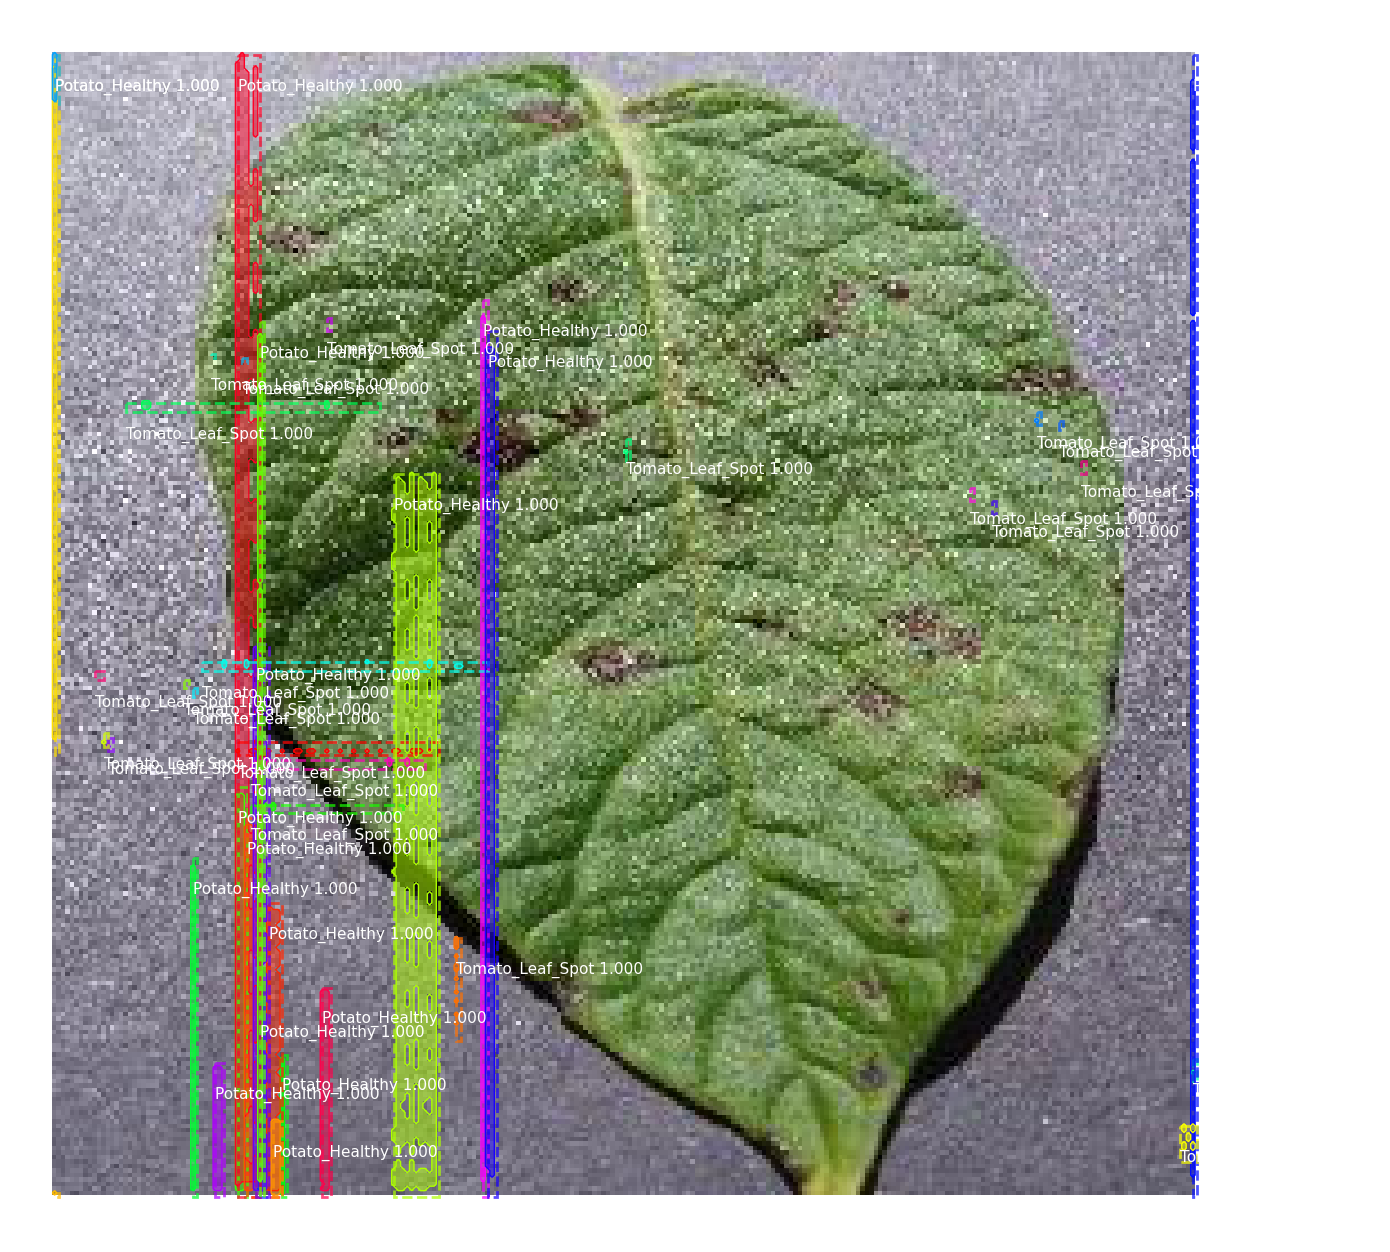

In [16]:
def apply_nms(objects, scores, nms_threshold=0.3):
    # Apply non-maximum suppression to avoid multiple detections of the same object
    keep_indices = utils.non_max_suppression(objects, scores, nms_threshold)
    return keep_indices

def detect_and_visualize(model, image_path, nms_threshold=0.3):
    # Load the image
    image = skimage.io.imread(image_path)

    # Detect objects in the image
    results = model.detect([image], verbose=1)
    r = results[0]

    # Apply NMS
    keep_indices = apply_nms(r['rois'], r['scores'], nms_threshold=nms_threshold)
    
    # Filter results after NMS
    filtered_rois = r['rois'][keep_indices]
    filtered_class_ids = r['class_ids'][keep_indices]
    filtered_scores = r['scores'][keep_indices]
    filtered_masks = r['masks'][:, :, keep_indices]

    # Visualize the results
    display_instances(image, filtered_rois, filtered_masks, filtered_class_ids, 
                      class_names, filtered_scores)

# Path to your image
image_path = '/Users/fatimanevrekar/Desktop/Plant_Health_Detection/Plant_Health_MaskRCNN/example.JPG'

# Run detection and visualization with NMS threshold adjustment
detect_and_visualize(model_, image_path, nms_threshold=0.3)